# Fraud Check with Risk Category

## problem statement

Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

**Data Description :**

    Undergrad           :   person is under graduated or not
    Marital.Status      :   marital status of a person
    Taxable.Income      :   Taxable income is the amount of how much tax an individual owes to the government 
    Work Experience     :   Work experience of an individual person
    Urban               :   Whether that person belongs to urban area or not

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
rawData = pd.read_csv('Fraud_check.csv') ## Read the data
rawData.head()

Undergrad Marital.Status  Taxable.Income  City.Population  Work.Experience  \
0        NO         Single           68833            50047               10   
1       YES       Divorced           33700           134075               18   
2        NO        Married           36925           160205               30   
3       YES         Single           50190           193264               15   
4        NO        Married           81002            27533               28   

  Urban  
0   YES  
1   YES  
2   YES  
3   YES  
4    NO

In [3]:
rawData.info() ## check shape and null values and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


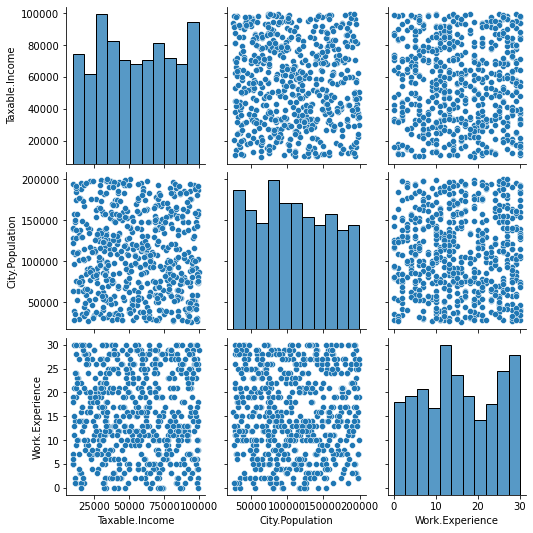

In [4]:
import seaborn as sns   ## checking any kind of relation between the vaiables which help predict better.
sns.pairplot(rawData)

***There is absolutely no correlation and nither the y variable 'Taxable.Income' nor independent variabels are normally ditributed. using a parametric model is not possible. hence we should go for non parametric model, such as Decision Tree.***

In [5]:
# value encoding for less than or equal to <= 30000 as '0' or 'Risky' else 'good' or '1'
yData = rawData['Taxable.Income'].copy() 
for i in range(len(yData)):
    if yData[i] > 30000:
        yData[i] = '1'

    else:
        yData[i] = '0'


In [6]:
print(f'The minority class "Risky category" is -- '
      f'{(yData.value_counts()[0]/np.sum(yData.value_counts())*100):.2f} percent only')
yData.value_counts()

The minority class "Risky category" is -- 20.67 percent only


1    476
0    124
Name: Taxable.Income, dtype: int64

### Imbalanced dataset

In [7]:
Y = yData.values
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [8]:
# Dummy encoding for rest of the dataset
xdata = pd.get_dummies(rawData.drop(labels=['Taxable.Income'],axis=1))
xdata

City.Population  Work.Experience  Undergrad_NO  Undergrad_YES  \
0              50047               10             1              0   
1             134075               18             0              1   
2             160205               30             1              0   
3             193264               15             0              1   
4              27533               28             1              0   
..               ...              ...           ...            ...   
595            39492                7             0              1   
596            55369                2             0              1   
597           154058                0             1              0   
598           180083               17             0              1   
599           158137               16             1              0   

     Marital.Status_Divorced  Marital.Status_Married  Marital.Status_Single  \
0                          0                       0                      1   
1                          1                       0                      0   
2                          0                       1                      0   
3                          0                       0                      1   
4                          0                       1                      0   
..                       ...                     ...                    ...   
595                        1                       0                      0   
596                        1                       0                      0   
597                        1                       0                      0   
598                        0                       1                      0   
599                        1                       0                      0   

     Urban_NO  Urban_YES  
0           0          1  
1           0          1  
2           0          1  
3           0          1  
4           1          0  
..        ...        ...  
595         0          1  
596         0          1  
597         0          1  
598         1          0  
599         1          0  

[600 rows x 9 columns]

In [9]:
X = xdata.values
X

array([[ 50047,     10,      1, ...,      1,      0,      1],
       [134075,     18,      0, ...,      0,      0,      1],
       [160205,     30,      1, ...,      0,      0,      1],
       ...,
       [154058,      0,      1, ...,      0,      0,      1],
       [180083,     17,      0, ...,      0,      1,      0],
       [158137,     16,      1, ...,      0,      1,      0]], dtype=int64)

In [10]:
# importing relevant methods and libraries for further model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [11]:
## splitting the data into train and test
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.33,random_state = 42)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(402, 9) (198, 9)
(402,) (198,)


In [12]:
# Checking the distribution of the train and test sets
print("y_train value counts\n",pd.Series(y_train).value_counts(),'\n')
print("y_test value counts\n",pd.Series(y_test).value_counts())

y_train value counts
 1    319
0     83
dtype: int64 

y_test value counts
 1    157
0     41
dtype: int64


**Our train-test split is distributed the target category well**

           ------------------------------- ************************ ---------------------------------

# DecisionTreeClassifier

***As it is a imbalanced data set we need to use the class weights in the algorithm***

    -> First tried with normal classifier without class weight but it gives high accuracy but the sensitivity is very less.
    -> Hence, worked with class weight as 'balance' and kept the depth to 4, mainly because of imbalance.
    -> Then worked with specific weights (calibrated weights) based on the accuracy, precision, and recall.
    -> Tried Entropy and Gini impurity for comparision.

In [13]:
# Initiating the Class object and fitting of the train data
dtce = DecisionTreeClassifier(criterion='entropy',max_depth=4,class_weight='balanced')
dtce.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=4)

[Text(1611.2250000000001, 1467.72, 'City.Population <= 60294.5\nentropy = 1.0\nsamples = 402\nvalue = [201.0, 201.0]\nclass = Risky'),
 Text(585.9000000000001, 1141.56, 'Work.Experience <= 6.5\nentropy = 0.974\nsamples = 93\nvalue = [33.904, 49.777]\nclass = Good'),
 Text(390.6, 815.4000000000001, 'entropy = 0.0\nsamples = 15\nvalue = [0.0, 9.451]\nclass = Good'),
 Text(781.2, 815.4000000000001, 'Work.Experience <= 24.5\nentropy = 0.995\nsamples = 78\nvalue = [33.904, 40.326]\nclass = Good'),
 Text(390.6, 489.24, 'Undergrad_YES <= 0.5\nentropy = 0.993\nsamples = 54\nvalue = [31.482, 25.834]\nclass = Risky'),
 Text(195.3, 163.08000000000015, 'entropy = 0.971\nsamples = 27\nvalue = [9.687, 14.492]\nclass = Good'),
 Text(585.9000000000001, 163.08000000000015, 'entropy = 0.927\nsamples = 27\nvalue = [21.795, 11.342]\nclass = Risky'),
 Text(1171.8000000000002, 489.24, 'City.Population <= 36345.0\nentropy = 0.593\nsamples = 24\nvalue = [2.422, 14.492]\nclass = Good'),
 Text(976.5, 163.080000

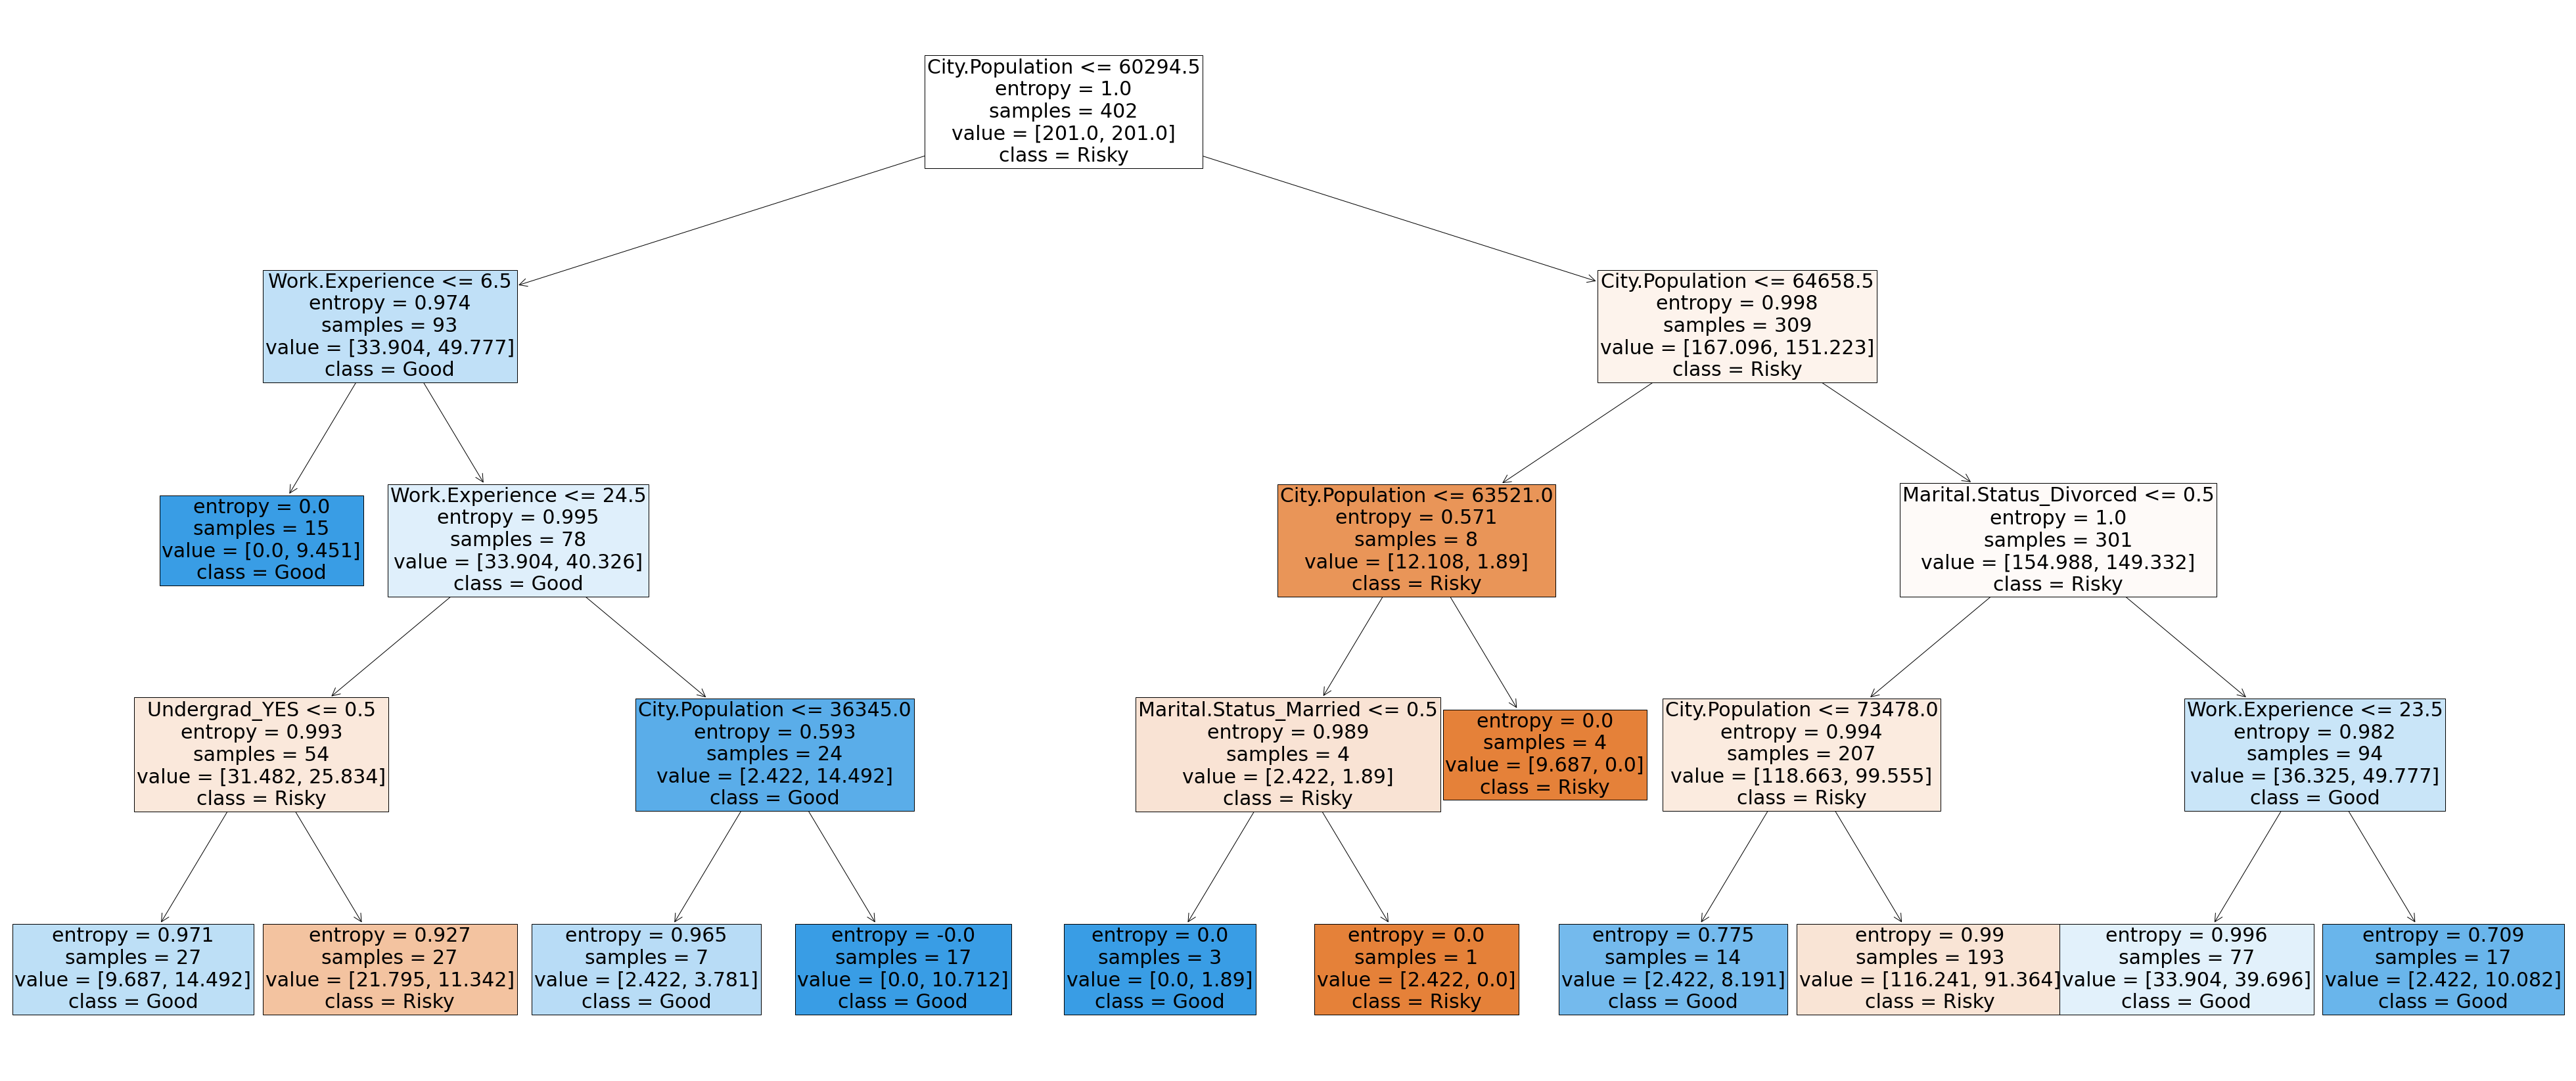

In [14]:
# plotting the decision tree
plt.figure(figsize=(70,30))
tree.plot_tree(dtce,fontsize=30,filled=True,feature_names=xdata.columns,class_names=['Risky','Good'])

In [15]:
# plotting the tree in text format
print(tree.export_text(dtce))

|--- feature_0 <= 60294.50
|   |--- feature_1 <= 6.50
|   |   |--- class: 1
|   |--- feature_1 >  6.50
|   |   |--- feature_1 <= 24.50
|   |   |   |--- feature_3 <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  0.50
|   |   |   |   |--- class: 0
|   |   |--- feature_1 >  24.50
|   |   |   |--- feature_0 <= 36345.00
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  36345.00
|   |   |   |   |--- class: 1
|--- feature_0 >  60294.50
|   |--- feature_0 <= 64658.50
|   |   |--- feature_0 <= 63521.00
|   |   |   |--- feature_5 <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_5 >  0.50
|   |   |   |   |--- class: 0
|   |   |--- feature_0 >  63521.00
|   |   |   |--- class: 0
|   |--- feature_0 >  64658.50
|   |   |--- feature_4 <= 0.50
|   |   |   |--- feature_0 <= 73478.00
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  73478.00
|   |   |   |   |--- class: 0
|   |   |--- feature_4 >  0.50
|   |   |   |--- feature_1 <= 23.50
|   |   |   | 

In [16]:
# pridicting on the train the dataset
Tpred = dtce.predict(x_train)
Tpred

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,

In [17]:
# Cheking the accuracy of the train data
print(f'classication accuracy  - {np.mean(y_train == Tpred)*100:.2f}','%')

classication accuracy  - 54.23 %


In [18]:
# Classification report for precission and recall
print(classification_report(y_train,Tpred))

              precision    recall  f1-score   support

           0       0.28      0.75      0.40        83
           1       0.88      0.49      0.63       319

    accuracy                           0.54       402
   macro avg       0.58      0.62      0.52       402
weighted avg       0.76      0.54      0.58       402



In [19]:
# Confusion metrix
print(confusion_matrix(y_train,Tpred))

[[ 62  21]
 [163 156]]


### Interpretaion of confusion metrix and classification report for Train dataset
***out of 83 risky class only 62 have been correctly identified so the recall is good with 75% however out of all risky prediction only 62 are correct hence the precission is very low at 28%***

In [20]:
## predicting on test dataset
pred = dtce.predict(x_test)
pred

array([1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0],
      dtype=int64)

In [22]:
print(f'classication accuracy  - {np.mean(y_test == pred)*100:.2f}','%')

classication accuracy  - 45.45 %


In [23]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.20      0.54      0.29        41
           1       0.78      0.43      0.56       157

    accuracy                           0.45       198
   macro avg       0.49      0.48      0.42       198
weighted avg       0.66      0.45      0.50       198



In [24]:
print(confusion_matrix(y_test,pred))

[[22 19]
 [89 68]]


### Interpretaion of predictions of Test Dataset

***Recall is 54% (out of 41 true Risky class only 22 are correctly idetified) which is way lower than train recall percentage, even the precission is 20% which is lower than Train Dataset. Both indicate overfitting issue.  

           ------------------------------- ************************ ---------------------------------

# DecisionTreeClassification with class_weight parameter (manual weights)

    inverse class weights - with calibration - Class weight is calibrated with multiple iteration on the Train dataset

In [25]:
# calculating the weights or each classes in the dataset.
a = pd.Series(y_train).value_counts()[1]/np.sum(pd.Series(y_train).value_counts())
b = 1-a
print('Weight of Good or "1"', a, '\nWeight of Risky or "0"',b, '\nTotal weight', a+b)

Weight of Good or "1" 0.7935323383084577 
Weight of Risky or "0" 0.2064676616915423 
Total weight 1.0


In [26]:
# Initiating class object for decission tree and fitting the Train dataset
dtce1 = DecisionTreeClassifier(criterion='entropy',max_depth=4,class_weight={1:.26,0:.74})
dtce1.fit(x_train,y_train)

DecisionTreeClassifier(class_weight={0: 0.74, 1: 0.26}, criterion='entropy',
                       max_depth=4)

[Text(993.9375, 978.48, 'City.Population <= 60294.5\nentropy = 0.984\nsamples = 402\nvalue = [61.42, 82.94]\nclass = Good'),
 Text(313.875, 761.0400000000001, 'Work.Experience <= 6.5\nentropy = 0.92\nsamples = 93\nvalue = [10.36, 20.54]\nclass = Good'),
 Text(209.25, 543.6, 'entropy = 0.0\nsamples = 15\nvalue = [0.0, 3.9]\nclass = Good'),
 Text(418.5, 543.6, 'Work.Experience <= 24.5\nentropy = 0.961\nsamples = 78\nvalue = [10.36, 16.64]\nclass = Good'),
 Text(209.25, 326.1600000000001, 'Undergrad_NO <= 0.5\nentropy = 0.998\nsamples = 54\nvalue = [9.62, 10.66]\nclass = Good'),
 Text(104.625, 108.72000000000003, 'entropy = 0.978\nsamples = 27\nvalue = [6.66, 4.68]\nclass = Risky'),
 Text(313.875, 108.72000000000003, 'entropy = 0.916\nsamples = 27\nvalue = [2.96, 5.98]\nclass = Good'),
 Text(627.75, 326.1600000000001, 'Marital.Status_Divorced <= 0.5\nentropy = 0.5\nsamples = 24\nvalue = [0.74, 5.98]\nclass = Good'),
 Text(523.125, 108.72000000000003, 'entropy = 0.0\nsamples = 17\nvalue = 

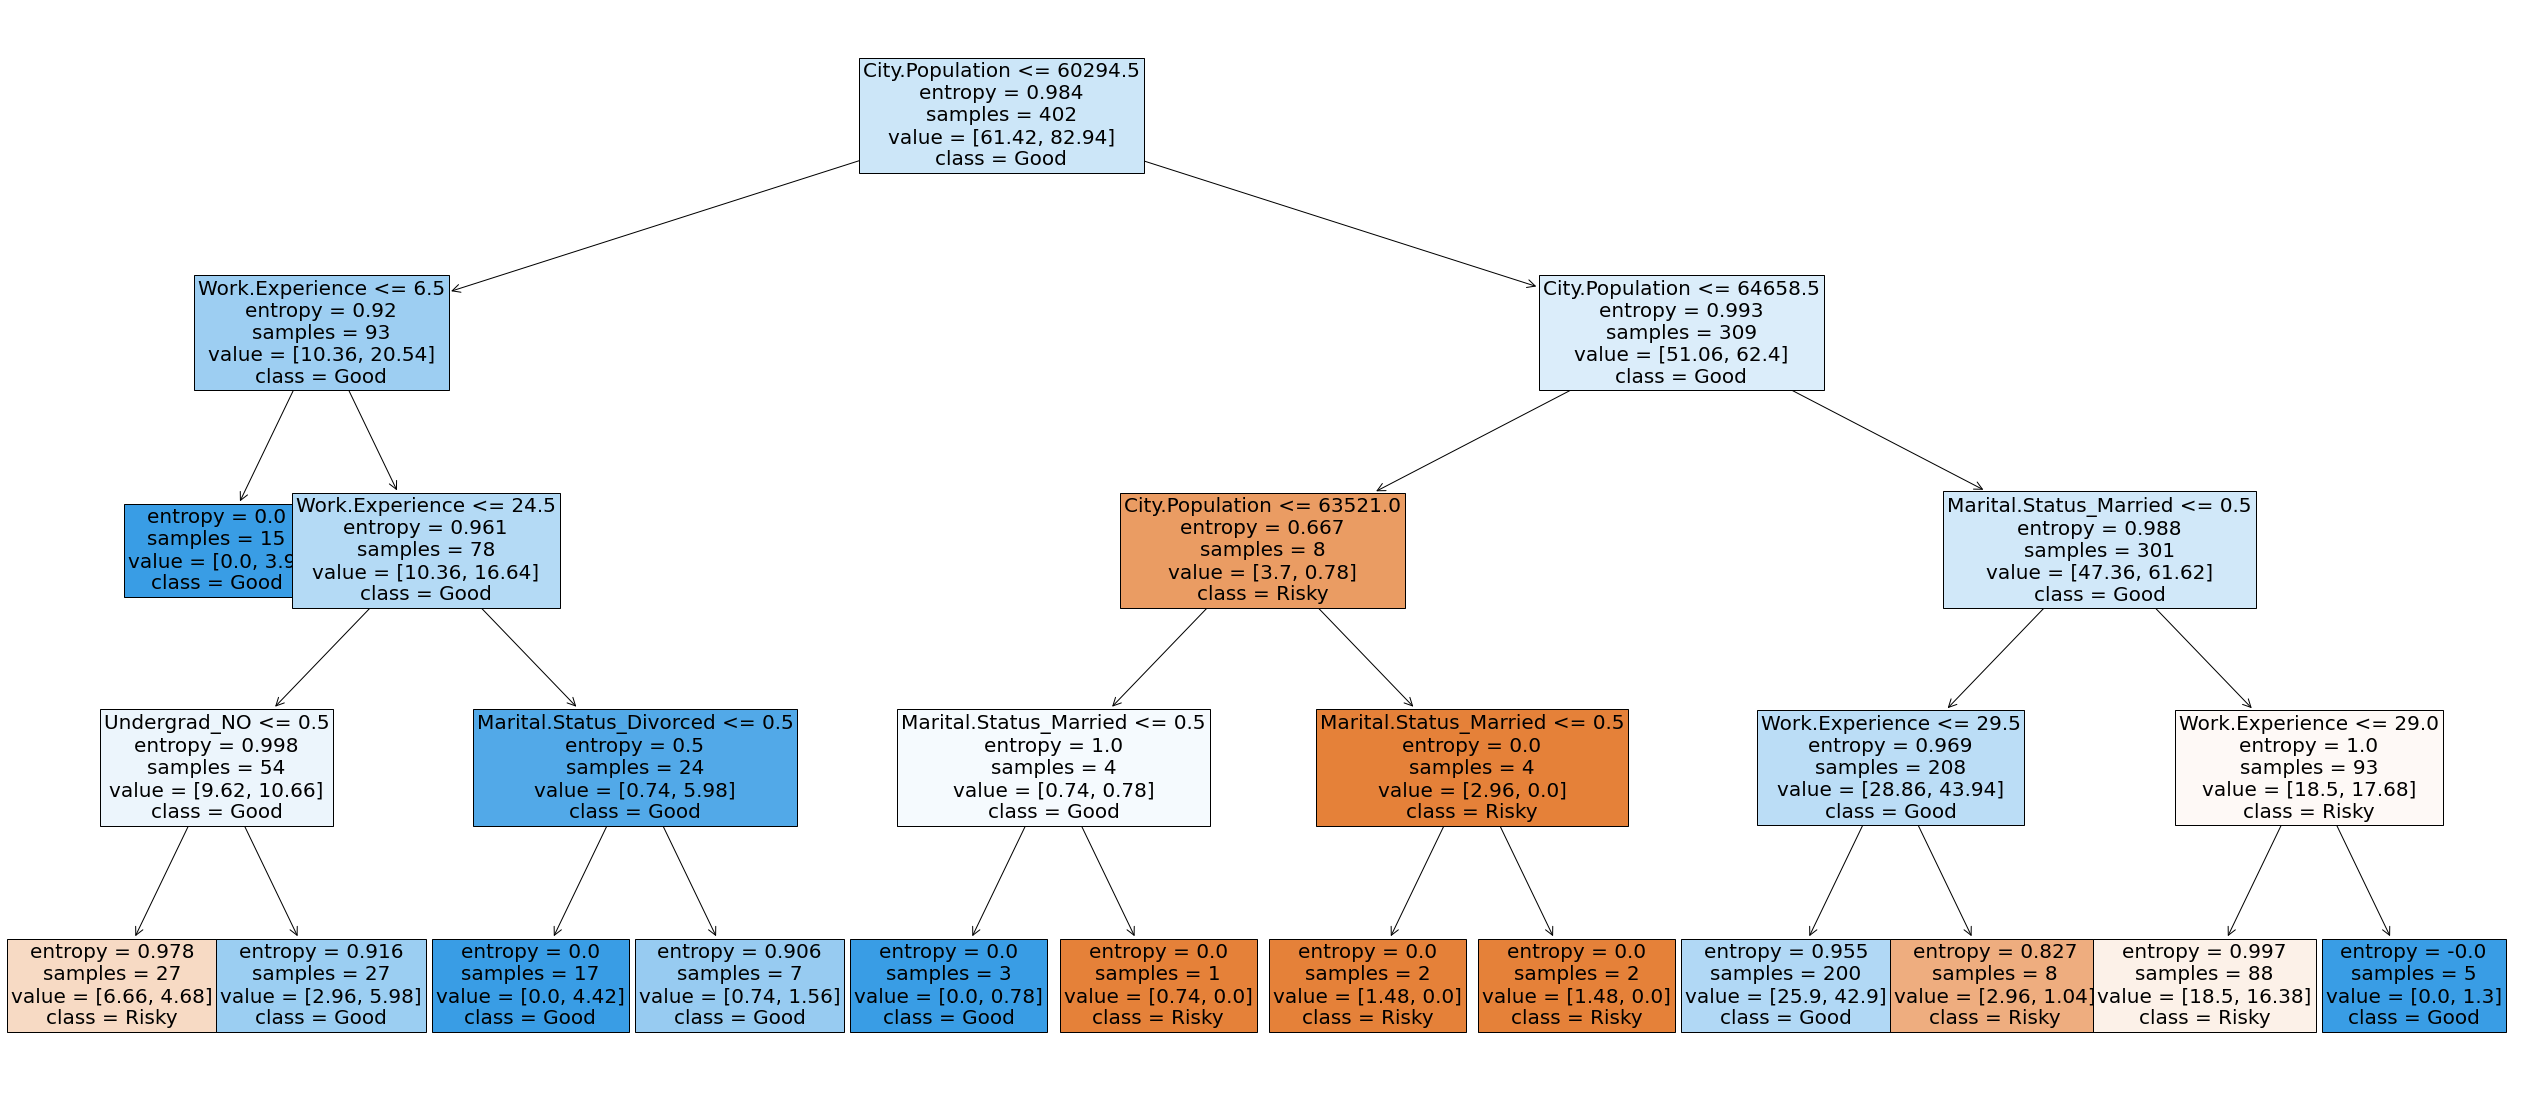

In [27]:
## plotting the decision tree
plt.figure(figsize=(45,20))
tree.plot_tree(dtce1,fontsize=20,filled=True,feature_names=xdata.columns,class_names=['Risky','Good'])

In [28]:
# Printing the Decission tree in text format
print(tree.export_text(dtce1))

|--- feature_0 <= 60294.50
|   |--- feature_1 <= 6.50
|   |   |--- class: 1
|   |--- feature_1 >  6.50
|   |   |--- feature_1 <= 24.50
|   |   |   |--- feature_2 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_2 >  0.50
|   |   |   |   |--- class: 1
|   |   |--- feature_1 >  24.50
|   |   |   |--- feature_4 <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_4 >  0.50
|   |   |   |   |--- class: 1
|--- feature_0 >  60294.50
|   |--- feature_0 <= 64658.50
|   |   |--- feature_0 <= 63521.00
|   |   |   |--- feature_5 <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_5 >  0.50
|   |   |   |   |--- class: 0
|   |   |--- feature_0 >  63521.00
|   |   |   |--- feature_5 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_5 >  0.50
|   |   |   |   |--- class: 0
|   |--- feature_0 >  64658.50
|   |   |--- feature_5 <= 0.50
|   |   |   |--- feature_1 <= 29.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  29.50
|   |   |   |   |--- 

In [29]:
# Predicting on the train dataset
Tpred1 = dtce1.predict(x_train)
Tpred1

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,

In [30]:
# classification accuracy overall on train dataset
print(f'classication accuracy  - {np.mean(y_train == Tpred1)*100:.2f}','%')

classication accuracy  - 68.91 %


In [31]:
# classification report on train dataset
print(classification_report(y_train,Tpred1))

              precision    recall  f1-score   support

           0       0.34      0.52      0.41        83
           1       0.85      0.73      0.79       319

    accuracy                           0.69       402
   macro avg       0.59      0.63      0.60       402
weighted avg       0.75      0.69      0.71       402



In [32]:
# Confusion matrix on train dataset
print(confusion_matrix(y_train,Tpred1))

[[ 43  40]
 [ 85 234]]


### Interpretaion of confusion metrix and classification report for Train dataset
***out of 83 risky class only 42 have been correctly identified so the recall is not good with 52%, and out of all risky prediction(128) only 43 are correct hence the precission is very low at 34% for risky category, still the precission is better and overall accuracy has improved over our first model***

In [33]:
# Predicting on test dataset
pred1 = dtce1.predict(x_test)
pred1

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0],
      dtype=int64)

In [34]:
# Classification Accuracy for Test data
print(f'classication accuracy  - {np.mean(y_test == pred1)*100:.2f}','%')

classication accuracy  - 60.61 %


In [35]:
# Classification Report for Test data
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.22      0.37      0.28        41
           1       0.80      0.67      0.73       157

    accuracy                           0.61       198
   macro avg       0.51      0.52      0.50       198
weighted avg       0.68      0.61      0.64       198



In [36]:
# Confusion matrix for Test dataset
print(confusion_matrix(y_test,pred1))

[[ 15  26]
 [ 52 105]]


### Interpretaion of confusion metrix and classification report for Test dataset
***out of 41 risky class only 15 have been correctly identified so the recall is bad with 37% worse than the training data. Out of all risky predictions(67) only 15 are correct for risky category. Hence the precission is very low at 22%, which is very low even in comparisson to train dataset, indicating overfitting problem***

           ------------------------------- ************************ ---------------------------------

# DecisionTreeClassifier - Gini impurity

In [37]:
# Initiating class object and fitting the train data
dtcg = DecisionTreeClassifier(criterion='gini',random_state=0,max_depth=4)
dtcg.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

[Text(2245.285714285714, 1956.96, 'Marital.Status_Married <= 0.5\ngini = 0.328\nsamples = 402\nvalue = [83, 319]\nclass = Good'),
 Text(1381.7142857142858, 1522.0800000000002, 'Work.Experience <= 23.5\ngini = 0.301\nsamples = 276\nvalue = [51, 225]\nclass = Good'),
 Text(690.8571428571429, 1087.2, 'City.Population <= 183724.5\ngini = 0.33\nsamples = 211\nvalue = [44, 167]\nclass = Good'),
 Text(345.42857142857144, 652.3200000000002, 'Work.Experience <= 13.5\ngini = 0.315\nsamples = 194\nvalue = [38, 156]\nclass = Good'),
 Text(172.71428571428572, 217.44000000000005, 'gini = 0.252\nsamples = 115\nvalue = [17, 98]\nclass = Good'),
 Text(518.1428571428571, 217.44000000000005, 'gini = 0.39\nsamples = 79\nvalue = [21, 58]\nclass = Good'),
 Text(1036.2857142857142, 652.3200000000002, 'Work.Experience <= 11.5\ngini = 0.457\nsamples = 17\nvalue = [6, 11]\nclass = Good'),
 Text(863.5714285714287, 217.44000000000005, 'gini = 0.408\nsamples = 7\nvalue = [5, 2]\nclass = Risk'),
 Text(1209.0, 217.4

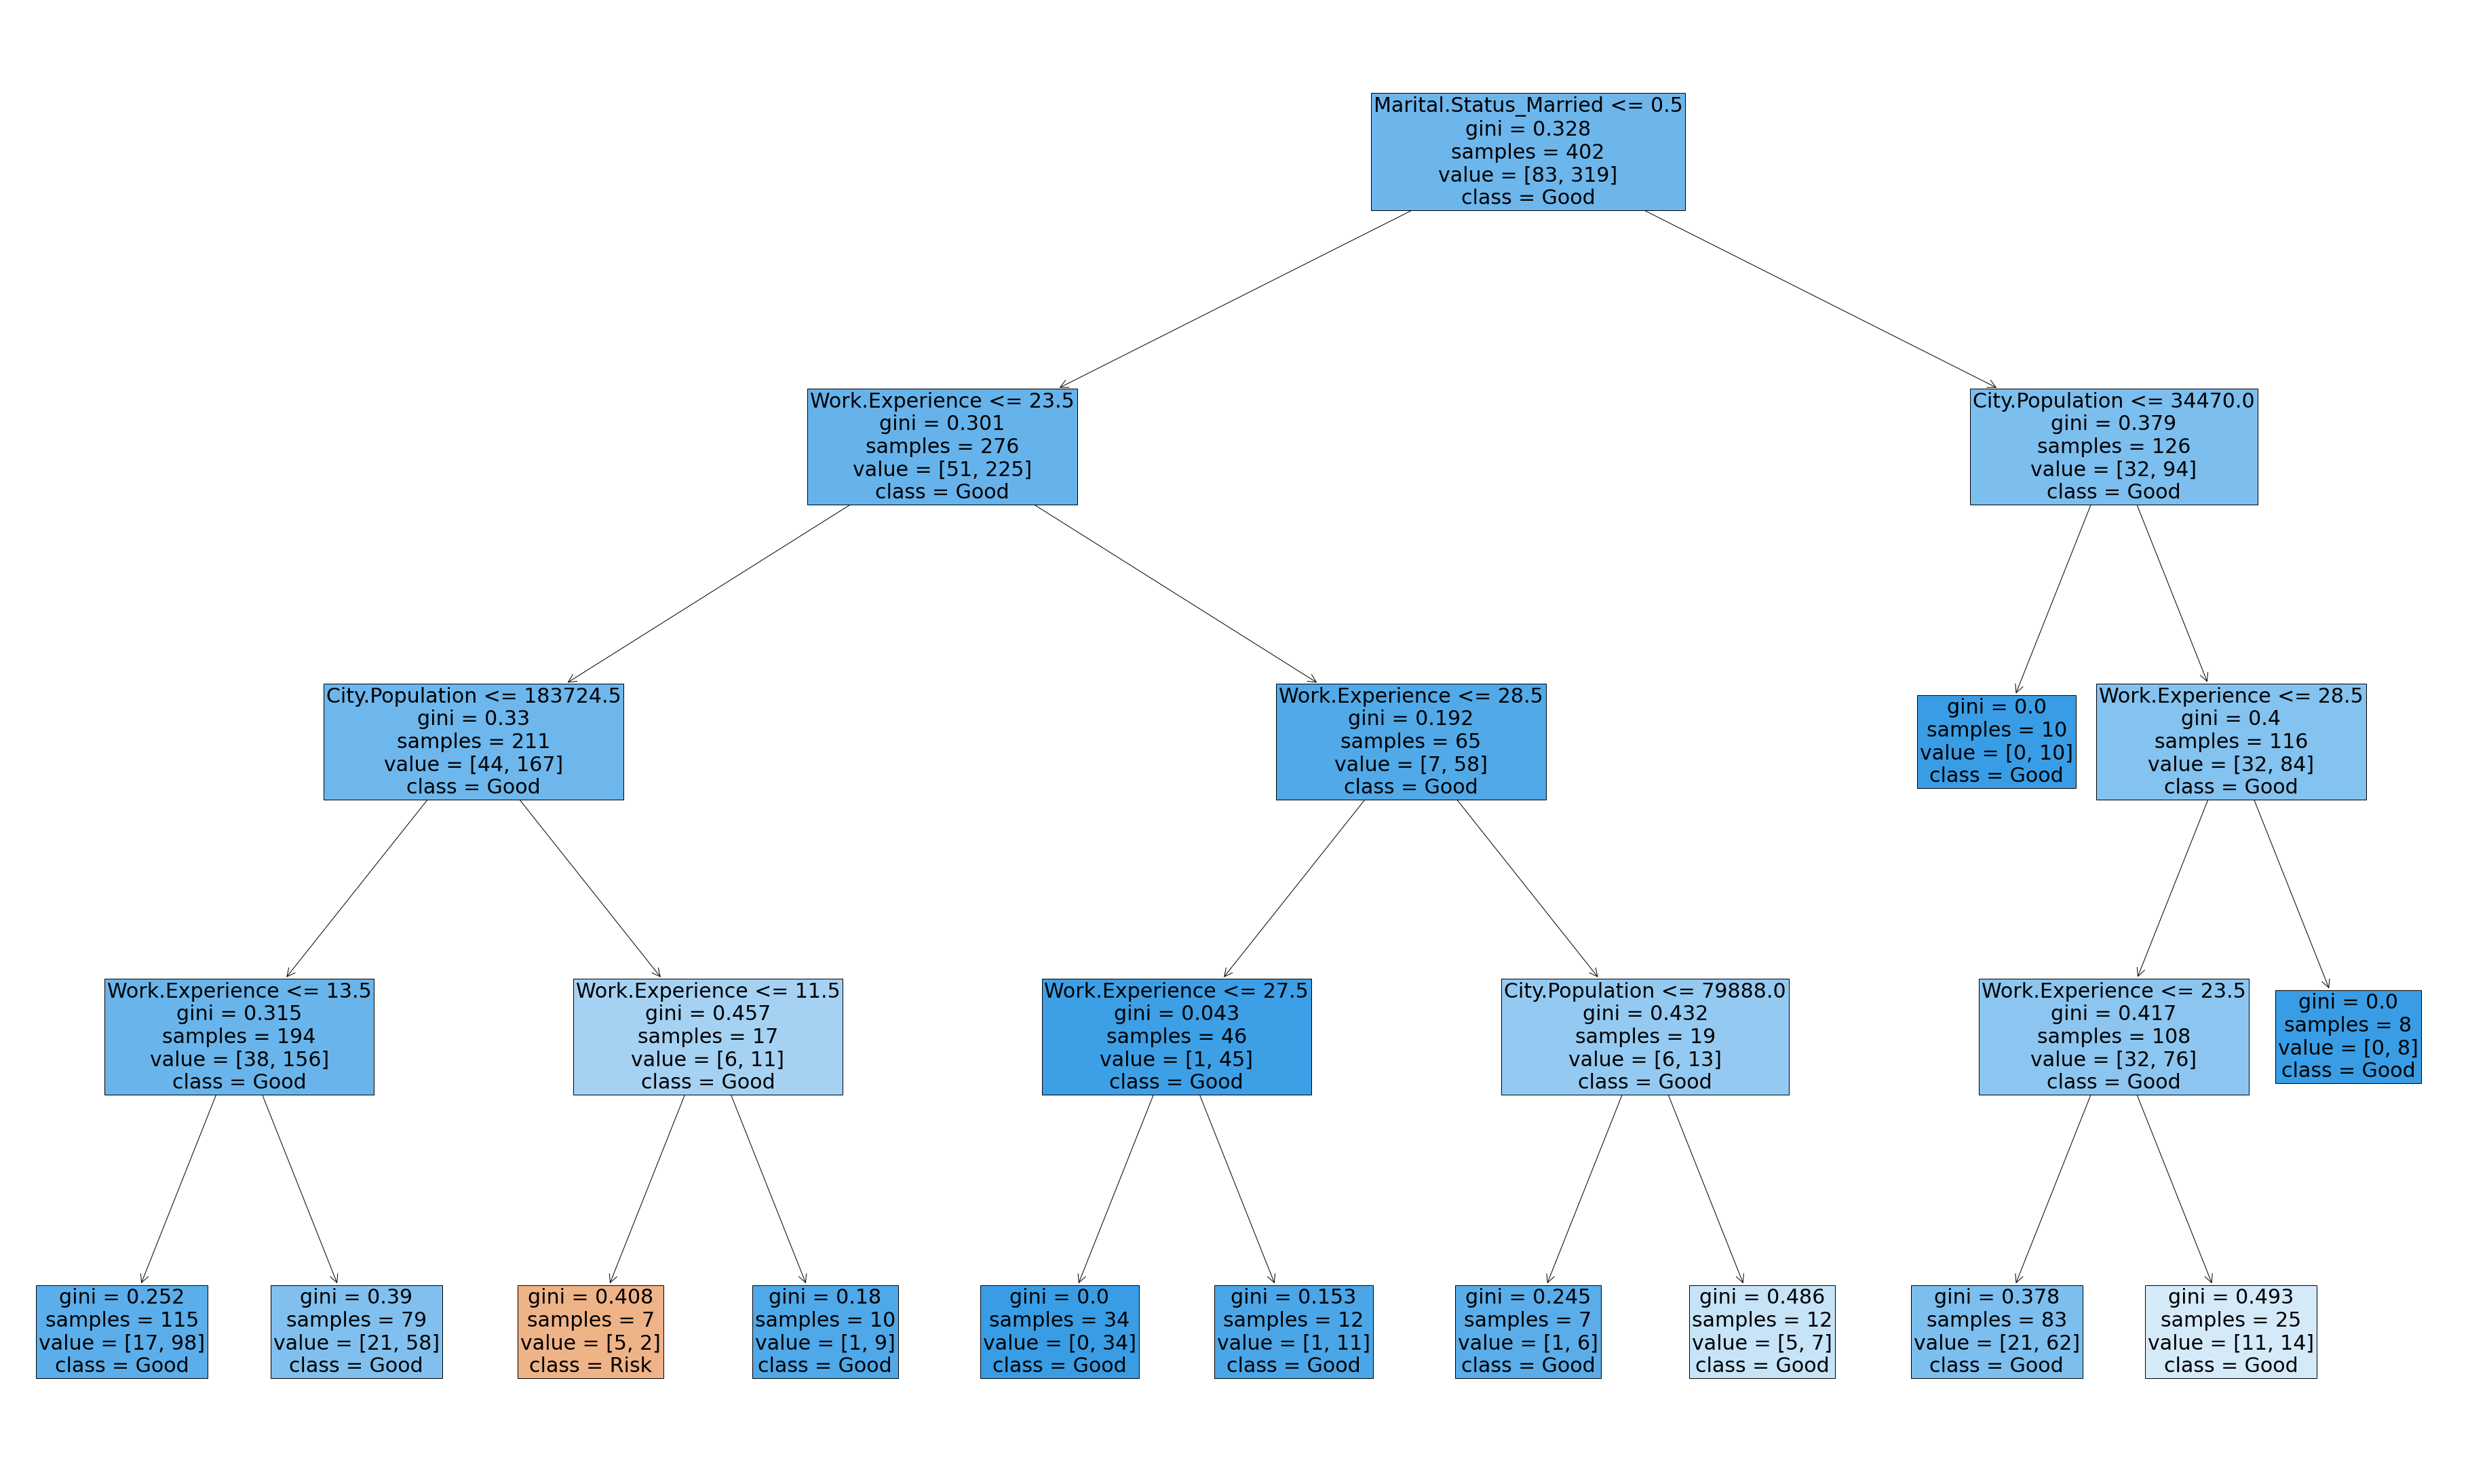

In [38]:
# plotting the decision tree
plt.figure(figsize=(65,40))
tree.plot_tree(dtcg,fontsize=30,feature_names=xdata.columns,filled=True,class_names=['Risk','Good'])

In [39]:
# Printing the Decision Tree in text format
print(tree.export_text(dtcg))

|--- feature_5 <= 0.50
|   |--- feature_1 <= 23.50
|   |   |--- feature_0 <= 183724.50
|   |   |   |--- feature_1 <= 13.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  13.50
|   |   |   |   |--- class: 1
|   |   |--- feature_0 >  183724.50
|   |   |   |--- feature_1 <= 11.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  11.50
|   |   |   |   |--- class: 1
|   |--- feature_1 >  23.50
|   |   |--- feature_1 <= 28.50
|   |   |   |--- feature_1 <= 27.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  27.50
|   |   |   |   |--- class: 1
|   |   |--- feature_1 >  28.50
|   |   |   |--- feature_0 <= 79888.00
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  79888.00
|   |   |   |   |--- class: 1
|--- feature_5 >  0.50
|   |--- feature_0 <= 34470.00
|   |   |--- class: 1
|   |--- feature_0 >  34470.00
|   |   |--- feature_1 <= 28.50
|   |   |   |--- feature_1 <= 23.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  23.50
|   |   | 

In [40]:
# Prediction for train dataset
Tpred2 = dtcg.predict(x_train)
Tpred2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [41]:
# Confistion metrix for train data
confusion_matrix(y_train,Tpred2)

array([[  5,  78],
       [  2, 317]], dtype=int64)

In [42]:
# Classification report for Train data
print(classification_report(y_train,Tpred2))

              precision    recall  f1-score   support

           0       0.71      0.06      0.11        83
           1       0.80      0.99      0.89       319

    accuracy                           0.80       402
   macro avg       0.76      0.53      0.50       402
weighted avg       0.78      0.80      0.73       402



In [44]:
# Calculating the Sensitivity and specificity - which is same as recall in our confusion matrix for respective classes.
print(np.sum(np.diag(confusion_matrix(y_train,Tpred2))))
print('Sensitivity   -> ',confusion_matrix(y_train,Tpred2)[0][0]/np.sum(confusion_matrix(y_train,Tpred2)[0]))
print('Specificity   -> ',confusion_matrix(y_train,Tpred2)[1][1]/np.sum(confusion_matrix(y_train,Tpred2)[1]))

322
Sensitivity   ->  0.060240963855421686
Specificity   ->  0.9937304075235109


### Interpretaion of confusion metrix and classification report for Train dataset
***out of 83 risky class only 5 have been correctly identified so the recall is very low with 6%. Out of all risky predictions(7) 7 are correct hence the precission is high at 71%, but this model is of no use for predicting the risky category if our intention is to find the not risky category with accuracy this model is very good as specificity of the model is 99%. but that is not our objective.***

In [45]:
# predicting on Test data
pred2 = dtcg.predict(x_test)
pred2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [46]:
# confusion matrix on Test data
confusion_matrix(y_test,pred2)

array([[  1,  40],
       [  1, 156]], dtype=int64)

In [47]:
# Classification report on Test data
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.50      0.02      0.05        41
           1       0.80      0.99      0.88       157

    accuracy                           0.79       198
   macro avg       0.65      0.51      0.47       198
weighted avg       0.73      0.79      0.71       198



In [50]:
# Calculating Sensitivity and Specificity wich is same as recall percentage for each classes.
print(np.sum(np.diag(confusion_matrix(y_test,pred2))))
print('Sensitivity   -> ',confusion_matrix(y_test,pred2)[0][0]/np.sum(confusion_matrix(y_test,pred2)[0]))
print('Specificity   -> ',confusion_matrix(y_test,pred2)[1][1]/np.sum(confusion_matrix(y_test,pred2)[1]))

157
Sensitivity   ->  0.024390243902439025
Specificity   ->  0.9936305732484076


### Interpretaion of confusion metrix and classification report for Test dataset
***out of 41 risky class only 1 have been correctly identified so the recall/Sensitivity is bad with just 2%. Further, out of all risky predictions(2) only 1 is correct. Hence, the precission is at 50%. Same as above this model is useless if our intention is to predict the risky class***

           ------------------------------- ************************ ---------------------------------

# DecisionTreeClassifier - Gini impurity - class weight

In [51]:
# Initiating class object and fitting the Train Data
dtcg1 = DecisionTreeClassifier(criterion='gini',random_state=0,max_depth=5,class_weight={0:.77,1:.23})
dtcg1.fit(x_train,y_train)

DecisionTreeClassifier(class_weight={0: 0.77, 1: 0.23}, max_depth=5,
                       random_state=0)

[Text(2022.75, 1993.2, 'City.Population <= 60294.5\ngini = 0.498\nsamples = 402\nvalue = [63.91, 73.37]\nclass = Good'),
 Text(976.5, 1630.8000000000002, 'Work.Experience <= 6.5\ngini = 0.467\nsamples = 93\nvalue = [10.78, 18.17]\nclass = Good'),
 Text(837.0, 1268.4, 'gini = 0.0\nsamples = 15\nvalue = [0.0, 3.45]\nclass = Good'),
 Text(1116.0, 1268.4, 'Work.Experience <= 24.5\ngini = 0.488\nsamples = 78\nvalue = [10.78, 14.72]\nclass = Good'),
 Text(558.0, 906.0, 'Undergrad_NO <= 0.5\ngini = 0.5\nsamples = 54\nvalue = [10.01, 9.43]\nclass = Risk'),
 Text(279.0, 543.5999999999999, 'City.Population <= 47397.5\ngini = 0.468\nsamples = 27\nvalue = [6.93, 4.14]\nclass = Risk'),
 Text(139.5, 181.19999999999982, 'gini = 0.401\nsamples = 16\nvalue = [5.39, 2.07]\nclass = Risk'),
 Text(418.5, 181.19999999999982, 'gini = 0.489\nsamples = 11\nvalue = [1.54, 2.07]\nclass = Good'),
 Text(837.0, 543.5999999999999, 'Marital.Status_Single <= 0.5\ngini = 0.465\nsamples = 27\nvalue = [3.08, 5.29]\nclass

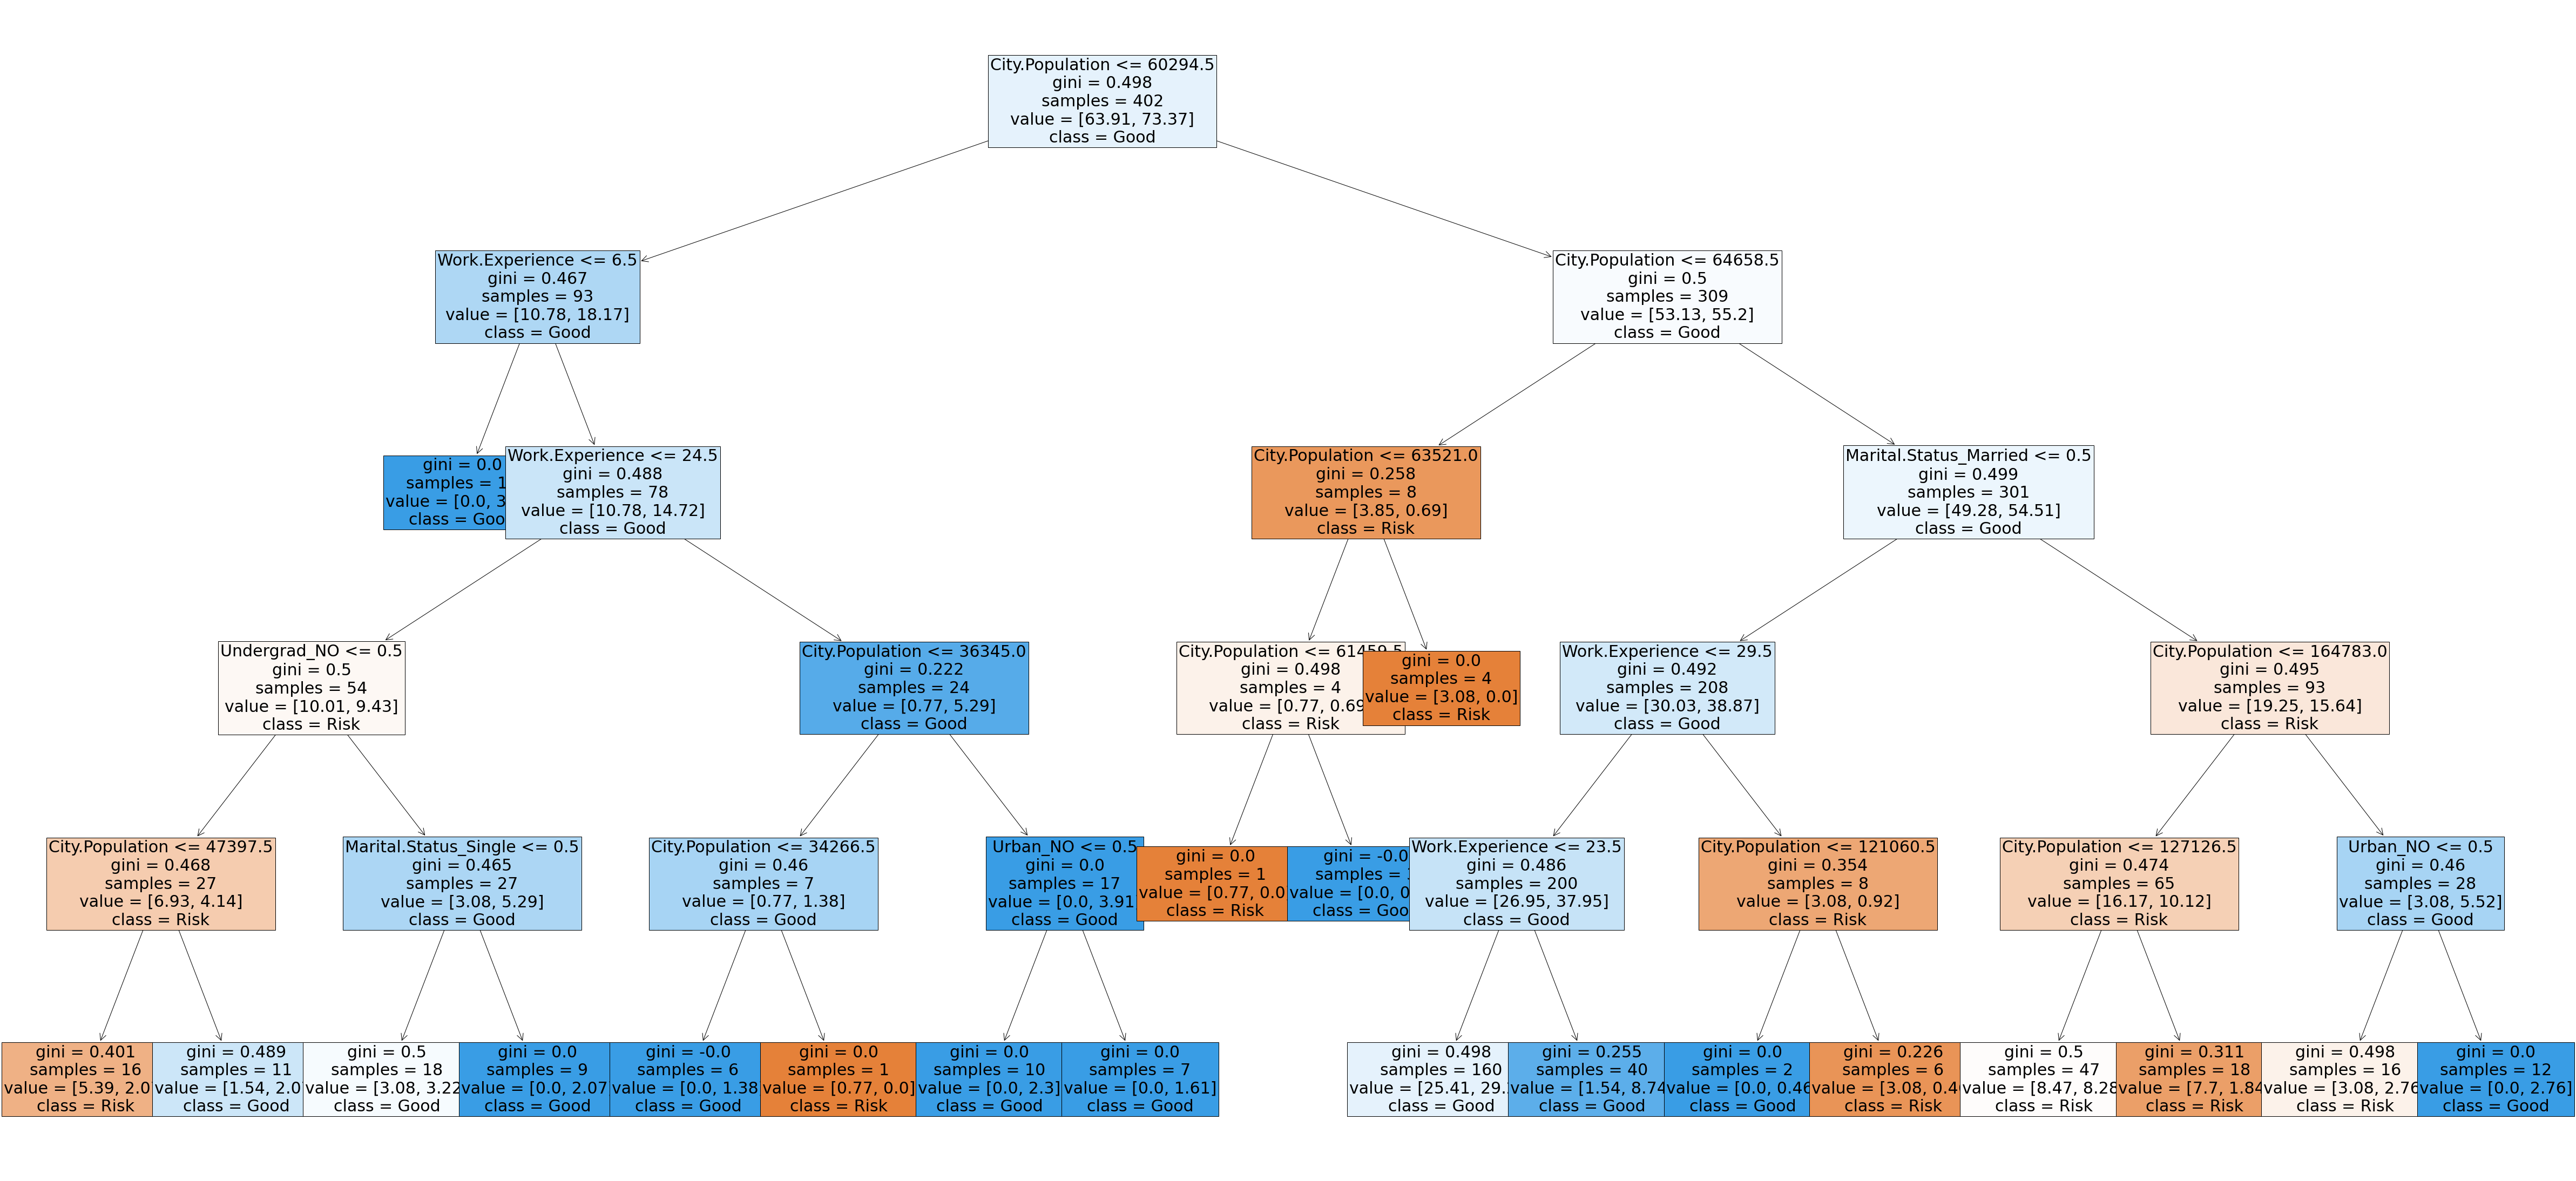

In [52]:
# Potting the decision tree
plt.figure(figsize=(85,40))
tree.plot_tree(dtcg1,fontsize=30,feature_names=xdata.columns,filled=True,class_names=['Risk','Good'])

In [53]:
# Pring the decision tree in text format
print(tree.export_text(dtcg1))

|--- feature_0 <= 60294.50
|   |--- feature_1 <= 6.50
|   |   |--- class: 1
|   |--- feature_1 >  6.50
|   |   |--- feature_1 <= 24.50
|   |   |   |--- feature_2 <= 0.50
|   |   |   |   |--- feature_0 <= 47397.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  47397.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  0.50
|   |   |   |   |--- feature_6 <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_6 >  0.50
|   |   |   |   |   |--- class: 1
|   |   |--- feature_1 >  24.50
|   |   |   |--- feature_0 <= 36345.00
|   |   |   |   |--- feature_0 <= 34266.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  34266.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  36345.00
|   |   |   |   |--- feature_7 <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_7 >  0.50
|   |   |   |   |   |--- class: 1
|--- feature_0 >  60294.50
|   |--- feature_0 <= 64658.50
|   |   |--- feature_0 <= 6

In [54]:
# predicting for train data and printing Confustion matrix
Tpred3 = dtcg1.predict(x_train)
confusion_matrix(y_train,dtcg1.predict(x_train))

array([[ 42,  41],
       [ 67, 252]], dtype=int64)

In [55]:
# Printing classification report
print(classification_report(y_train,dtcg1.predict(x_train)))

              precision    recall  f1-score   support

           0       0.39      0.51      0.44        83
           1       0.86      0.79      0.82       319

    accuracy                           0.73       402
   macro avg       0.62      0.65      0.63       402
weighted avg       0.76      0.73      0.74       402



In [57]:
# Calculating Sensitivity and Specificity which is same as recall for each classes
print(np.sum(np.diag(confusion_matrix(y_train,dtcg1.predict(x_train)))))
print('Sensitivity   -> ',confusion_matrix(y_train,Tpred3)[0][0]/np.sum(confusion_matrix(y_train,Tpred3)[0]))
print('Specificity   -> ',confusion_matrix(y_train,Tpred3)[1][1]/np.sum(confusion_matrix(y_train,Tpred3)[1]))

294
Sensitivity   ->  0.5060240963855421
Specificity   ->  0.7899686520376176


### Interpretaion of confusion metrix and classification report for Train dataset
***out of 83 risky class only 42 have been correctly identified so the recall is ok with 51%. Out of all risky predictions(109) 42 are correct hence the precission is high at 39%, which is better than the previous models 1 & 2 but this model performs poorly in predicting the risky category***

In [58]:
# Predicting on test data and plotting confusion matrix
pred3 = dtcg1.predict(x_test)
confusion_matrix(y_test,pred3)

array([[ 10,  31],
       [ 41, 116]], dtype=int64)

In [59]:
# Printing classification report for test dataset
print(classification_report(y_test,pred3))

              precision    recall  f1-score   support

           0       0.20      0.24      0.22        41
           1       0.79      0.74      0.76       157

    accuracy                           0.64       198
   macro avg       0.49      0.49      0.49       198
weighted avg       0.67      0.64      0.65       198



### Interpretaion of confusion metrix and classification report for Test dataset
***out of 41 risky class only 10 have been correctly identified so the recall is very low with 24%. Out of all risky predictions(51) 10 are correct hence the precission is low at 20%, as said before this model performs poorly in predicting the risky category.***

           ------------------------------- ************************ ---------------------------------

# DecisionTreeClassifier with depth 8

In [60]:
# Initiating class object and fitting the train data
dtce2 = DecisionTreeClassifier(criterion='entropy',max_depth=9)
dtce2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9)

[Text(3828.0619565217394, 3614.9399999999996, 'Marital.Status_Married <= 0.5\nentropy = 0.735\nsamples = 402\nvalue = [83, 319]\nclass = Good'),
 Text(1663.6891304347828, 3234.42, 'Work.Experience <= 23.5\nentropy = 0.69\nsamples = 276\nvalue = [51, 225]\nclass = Good'),
 Text(709.6304347826087, 2853.8999999999996, 'Work.Experience <= 0.5\nentropy = 0.739\nsamples = 211\nvalue = [44, 167]\nclass = Good'),
 Text(583.4739130434783, 2473.38, 'entropy = 0.0\nsamples = 7\nvalue = [0, 7]\nclass = Good'),
 Text(835.7869565217392, 2473.38, 'Work.Experience <= 1.5\nentropy = 0.752\nsamples = 204\nvalue = [44, 160]\nclass = Good'),
 Text(378.46956521739133, 2092.8599999999997, 'Undergrad_NO <= 0.5\nentropy = 1.0\nsamples = 6\nvalue = [3, 3]\nclass = Risky'),
 Text(252.31304347826088, 1712.3400000000001, 'City.Population <= 52455.0\nentropy = 0.971\nsamples = 5\nvalue = [3, 2]\nclass = Risky'),
 Text(126.15652173913044, 1331.8199999999997, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Good

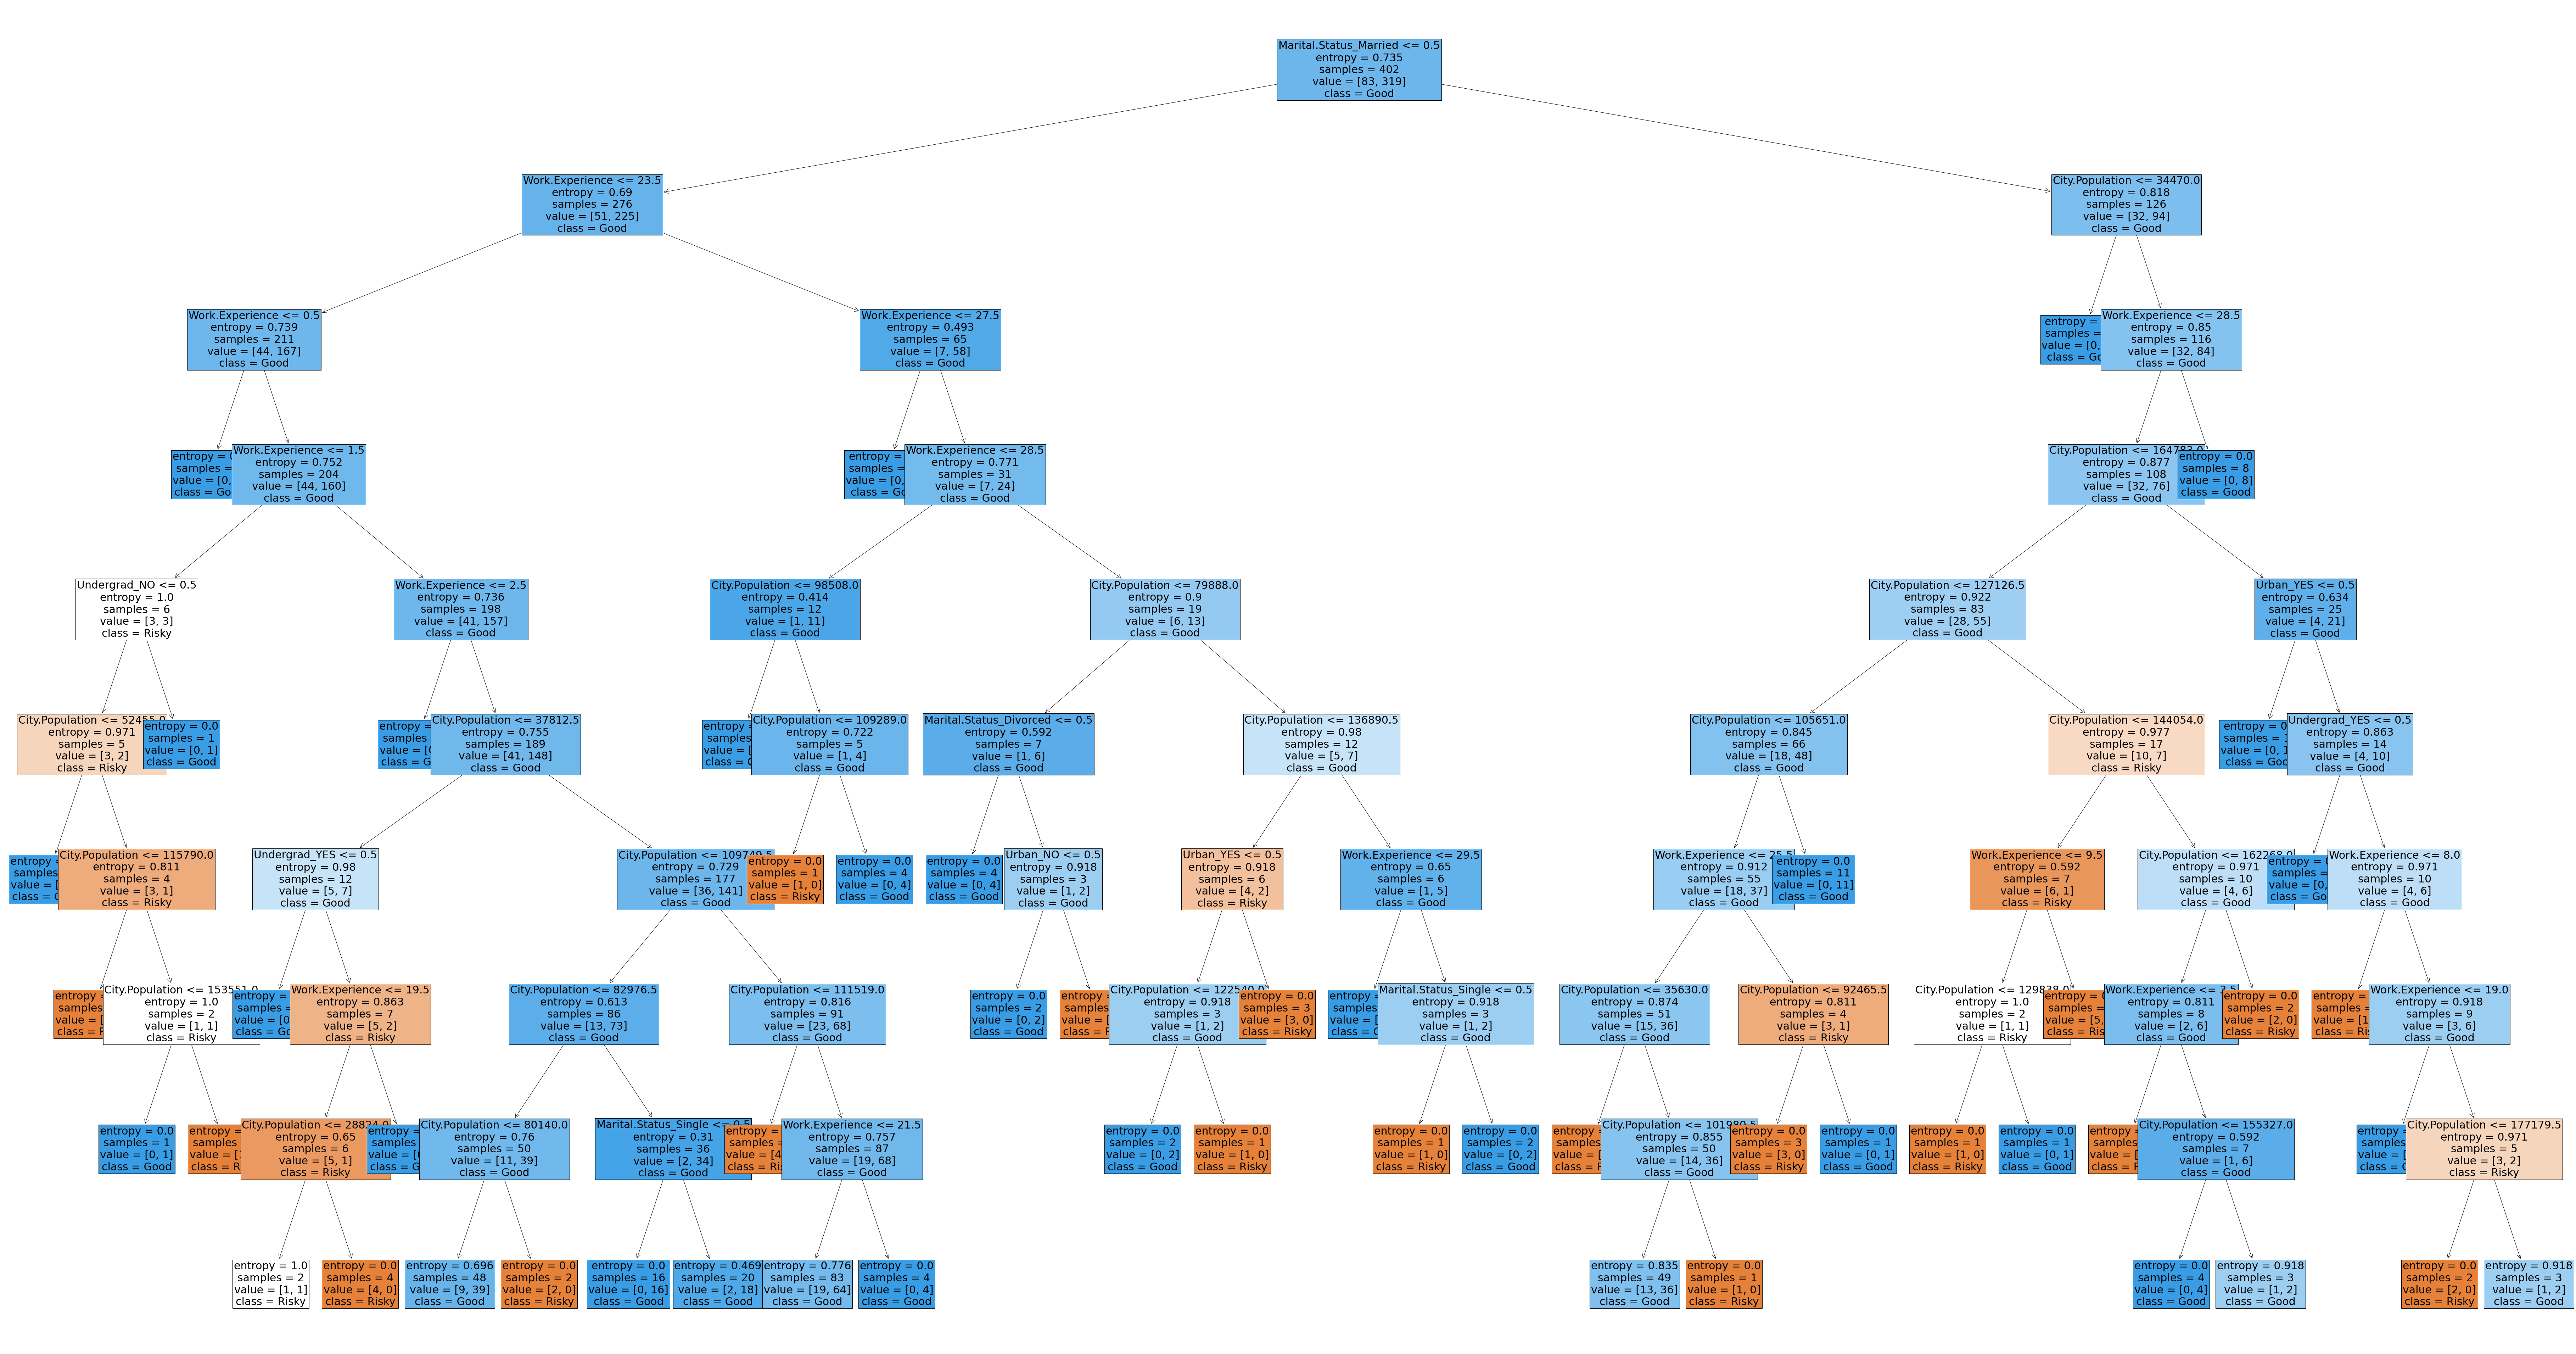

In [68]:
# plotting the Decision Tree 
plt.figure(figsize=(130,70))
tree.plot_tree(dtce2,fontsize=30,filled=True,feature_names=xdata.columns,class_names=['Risky','Good'])

In [63]:
# Printing the Decision Tree in Text format
print(tree.export_text(dtce2))

|--- feature_5 <= 0.50
|   |--- feature_1 <= 23.50
|   |   |--- feature_1 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_1 >  0.50
|   |   |   |--- feature_1 <= 1.50
|   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |--- feature_0 <= 52455.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_0 >  52455.00
|   |   |   |   |   |   |--- feature_0 <= 115790.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_0 >  115790.00
|   |   |   |   |   |   |   |--- feature_0 <= 153551.00
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_0 >  153551.00
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_2 >  0.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  1.50
|   |   |   |   |--- feature_1 <= 2.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_1 >  2.50
|   |   |   |   |   |--- feature_0 <= 37812.50
|   |   |   |   |   |   |--- feature_3

In [69]:
# predicting for train data and printing Confustion matrix
Tpred4 = dtce2.predict(x_train)
confusion_matrix(y_train,dtce2.predict(x_train))

array([[ 38,  45],
       [  1, 318]], dtype=int64)

In [66]:
# Printing classification report
print(classification_report(y_train,dtce2.predict(x_train)))

              precision    recall  f1-score   support

           0       0.97      0.46      0.62        83
           1       0.88      1.00      0.93       319

    accuracy                           0.89       402
   macro avg       0.93      0.73      0.78       402
weighted avg       0.90      0.89      0.87       402



In [70]:
# Calculating Sensitivity and Specificity which is same as recall for each classes
print(np.sum(np.diag(confusion_matrix(y_train,dtce2.predict(x_train)))))
print('Sensitivity   -> ',confusion_matrix(y_train,Tpred4)[0][0]/np.sum(confusion_matrix(y_train,Tpred4)[0]))
print('Specificity   -> ',confusion_matrix(y_train,Tpred4)[1][1]/np.sum(confusion_matrix(y_train,Tpred4)[1]))

356
Sensitivity   ->  0.4578313253012048
Specificity   ->  0.9968652037617555


### Interpretaion of confusion metrix and classification report for Train dataset
***out of 83 risky class only 38 have been correctly identified so the recall is not ok with 46%. Out of all risky predictions(39) 38 are correct hence the precission is high at 97%%, which is better than the previous models 1 & 2 but this model performs poorly in predicting the risky category, however it is accurate in predicting non risky category with most accuracy***

In [71]:
# Predicting on test data and plotting confusion matrix
pred4 = dtce2.predict(x_test)
confusion_matrix(y_test,pred4)

array([[  4,  37],
       [ 18, 139]], dtype=int64)

In [72]:
# Printing classification report for test dataset
print(classification_report(y_test,pred4))

              precision    recall  f1-score   support

           0       0.18      0.10      0.13        41
           1       0.79      0.89      0.83       157

    accuracy                           0.72       198
   macro avg       0.49      0.49      0.48       198
weighted avg       0.66      0.72      0.69       198



In [73]:
# Calculating Sensitivity and Specificity which is same as recall for each classes
print(np.sum(np.diag(confusion_matrix(y_test,dtce2.predict(x_test)))))
print('Sensitivity   -> ',confusion_matrix(y_test,pred4)[0][0]/np.sum(confusion_matrix(y_test,pred4)[0]))
print('Specificity   -> ',confusion_matrix(y_test,pred4)[1][1]/np.sum(confusion_matrix(y_test,pred4)[1]))

143
Sensitivity   ->  0.0975609756097561
Specificity   ->  0.8853503184713376


### Interpretaion of confusion metrix and classification report for Test dataset
***out of 41 risky class only 4 have been correctly identified so the recall is very low with 10%. Out of all risky predictions(22) 4 are correct hence the precission is low at 18%, as said before this model performs poorly in predicting the risky category. so the accuracy of the model has dropped drastically which is the sign of overfitting***

## None of the model are faring well in classifying or identifying the risk category with a reasonable accuracy.
                              Train                                                  Test
               Accuracy     Sensitivity      precission               Accuracy     Sensitivity      precission
    Model-1      54             75              28                       55            54               20
    Model-2      69             52              34                       61            37               22
    Model-3      80              6              71                       79             2               50
    Model-4      73             51              39                       64            24               20
    Model-5      89             46              97                       72            10               18

            ----------------------------------- ******************** -------------------------------------------

# DecisionTreeRegressor - not useful

In [ ]:
# Yr = rawData['Taxable.Income'].values
# Yr[1:10]

In [ ]:
# Xr = xdata.values
# Xr[1:5]

In [ ]:
# xr_train,xr_test,yr_train,yr_test = train_test_split(Xr,Yr,test_size = .2,random_state = 0)
# print(xr_train.shape,xr_test.shape)
# print(yr_train.shape,yr_test.shape)

In [ ]:
# dtr = DecisionTreeRegressor(max_depth=5,random_state=0)
# dtr.fit(xr_train,yr_train)

In [ ]:
# plt.figure(figsize=(120,60))
# tree.plot_tree(dtr,fontsize=25,feature_names=xdata.columns,filled=True,class_names=True)

### Trying to build a decision tree using gini impurity with selected features.***

That did not help. hence dropped the idea

In [ ]:
# dtcc = DecisionTreeClassifier(criterion='gini',max_depth=4, random_state=0)
# dtcc.fit(x_train[:,0:2],y_train)

In [ ]:
# plt.figure(figsize=(60,40))
# tree.plot_tree(dtcc,fontsize=25,filled=True,class_names=['0','1'])

                   ------------------*****************************------------------ 

# Isolationforest for outlier detection

***Trying the Isolation forest to check the outliers. but of no help***

*model for various values for contamination is just identifying risky category as outliers. this is ok as fraud transactions are not normal transactions they are small in number.*

In [74]:
# creating a suitable data object for PPSCORE
Data = pd.concat([yData,xdata],axis=1)

In [86]:
## Checking the data
Data.head()

Taxable.Income  City.Population  Work.Experience  Undergrad_NO  \
0               1            50047               10             1   
1               1           134075               18             0   
2               1           160205               30             1   
3               1           193264               15             0   
4               1            27533               28             1   

   Undergrad_YES  Marital.Status_Divorced  Marital.Status_Married  \
0              0                        0                       0   
1              1                        1                       0   
2              0                        0                       1   
3              1                        0                       0   
4              0                        0                       1   

   Marital.Status_Single  Urban_NO  Urban_YES  
0                      1         0          1  
1                      0         0          1  
2                      0         0          1  
3                      1         0          1  
4                      0         1          0

In [91]:
## Changing the target variable datatype as Category
Data['Taxable.Income'] = Data['Taxable.Income'].astype('category')

In [92]:
## Checking the Datatype for Taxable income
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Taxable.Income           600 non-null    category
 1   City.Population          600 non-null    int64   
 2   Work.Experience          600 non-null    int64   
 3   Undergrad_NO             600 non-null    uint8   
 4   Undergrad_YES            600 non-null    uint8   
 5   Marital.Status_Divorced  600 non-null    uint8   
 6   Marital.Status_Married   600 non-null    uint8   
 7   Marital.Status_Single    600 non-null    uint8   
 8   Urban_NO                 600 non-null    uint8   
 9   Urban_YES                600 non-null    uint8   
dtypes: category(1), int64(2), uint8(7)
memory usage: 14.3 KB


In [75]:
from sklearn.ensemble import IsolationForest

In [76]:
## initiating the class object
CIF = IsolationForest(random_state=0,contamination=0.1)

In [95]:
# Fitting the data on the class object
CIF.fit(Data)

IsolationForest(contamination=0.1, random_state=0)

In [100]:
## Predictin on the data for outliers the value -1 shows outliers as identified by algorithm
CIF.predict(Data)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,
        1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1

In [97]:
# Checking on the original dataset for outliers by filtering the anomally column
data1 = Data.copy(deep=True)
data1['anomally'] = pd.Series(CIF.predict(Data))
data1[data1.anomally < 0]

Taxable.Income  City.Population  Work.Experience  Undergrad_NO  \
12               0           148033               14             1   
16               0            34551               29             0   
19               0           126953               30             1   
21               0            29106                7             0   
34               0           183767                1             0   
36               0           193995                5             0   
38               0           177575                3             1   
48               0            35480               12             1   
68               0           139642                5             1   
79               0           140885                7             1   
85               0           125155               12             0   
87               0            64075               23             0   
89               0           176050               20             0   
110              0            32450               19             1   
114              0           197934                7             1   
118              0           199174               10             1   
126              0           195022                3             0   
137              0           115884                6             0   
153              0           114841               28             0   
154              0            82520               29             1   
168              0           167629               30             1   
181              0            36116               20             1   
182              0            89632                4             1   
194              0           103981               28             0   
196              0            28410               21             0   
204              0           173091               14             1   
219              0            26814                9             0   
232              0           150349                2             0   
237              0           128996                3             1   
247              0           108245                1             0   
259              0           197841                7             1   
267              0           183946               11             1   
280              0            33184                1             1   
284              0           188383               22             1   
301              0            39797               11             0   
315              0           176278               19             0   
326              0           165001               19             0   
329              0            39360               10             1   
337              0            73490                7             0   
346              0           134635               30             1   
347              0            80991                0             1   
349              0            72255               30             0   
354              0           176891               27             0   
356              0            46480               27             1   
357              0            84034               28             1   
392              0            37776               15             0   
398              0            64070                2             1   
409              1           163058                1             1   
439              0            48956                8             0   
443              0           189209                9             0   
444              0            36956               14             0   
446              0            65708               28             1   
457              0            36055               24             1   
471              0           192410               21             1   
493              0           103226               29             1   
509              0            65531               27             1   
517           

In [98]:
## Printing the shape and value counts to check and compare the outlier count
print(data1.shape)
print(data1['Taxable.Income'].value_counts())
data1[data1.anomally < 0].shape

(600, 11)
1    476
0    124
Name: Taxable.Income, dtype: int64


(60, 11)

**Out of total Risky catagory of 124 almost 50% are being categorized as outliers by isolation forest. Which is not a good sign. but normally in realtime data sets the risky and default or deffects are just at 2 to 5 percent hence that is not abnormal.. WE NEED TO FIND A WAY TO PROCESS THE DATA MORE ACCURATELY...**

# Trying -- ppscore for predictive power

***Tried ppscore for predictive power and it suggests that none of the independent variables have predictive power more than 0. either the data or features are insfficient to identify the fraud. or we should settle at compromising the accuracy of the model to get desired precission.***

In [ ]:
## install package if required otherwise skipp this step
!pip install ppscore

In [83]:
import ppscore as ps

In [94]:
psscore = ps.matrix(Data)              ## calculating ppscore using matrix method
psscore[psscore.y == 'Taxable.Income'] ## filtering the Y column or Dependent variable as Taxable.Income for predictive score

x               y  ppscore            case  \
0            Taxable.Income  Taxable.Income      1.0  predict_itself   
10          City.Population  Taxable.Income      0.0  classification   
20          Work.Experience  Taxable.Income      0.0  classification   
30             Undergrad_NO  Taxable.Income      0.0  classification   
40            Undergrad_YES  Taxable.Income      0.0  classification   
50  Marital.Status_Divorced  Taxable.Income      0.0  classification   
60   Marital.Status_Married  Taxable.Income      0.0  classification   
70    Marital.Status_Single  Taxable.Income      0.0  classification   
80                 Urban_NO  Taxable.Income      0.0  classification   
90                Urban_YES  Taxable.Income      0.0  classification   

    is_valid_score       metric  baseline_score  model_score  \
0             True         None        0.000000     1.000000   
10            True  weighted F1        0.701908     0.669739   
20            True  weighted F1        0.701908     0.698570   
30            True  weighted F1        0.701908     0.701908   
40            True  weighted F1        0.701908     0.701908   
50            True  weighted F1        0.701908     0.701908   
60            True  weighted F1        0.701908     0.701908   
70            True  weighted F1        0.701908     0.701908   
80            True  weighted F1        0.701908     0.701908   
90            True  weighted F1        0.701908     0.701908   

                       model  
0                       None  
10  DecisionTreeClassifier()  
20  DecisionTreeClassifier()  
30  DecisionTreeClassifier()  
40  DecisionTreeClassifier()  
50  DecisionTreeClassifier()  
60  DecisionTreeClassifier()  
70  DecisionTreeClassifier()  
80  DecisionTreeClassifier()  
90  DecisionTreeClassifier()

## None of the features perform better than the baseline_score